In [15]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from dsa_analysis import load_config, visualize, visualize_same_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import main
from main import RNNLayer
import ast
import DSA
import copy
from notebooks.utils_rnn import *

from os import name
import numpy as np
import neurogym as ngym
import matplotlib.pyplot as plt
from neurogym import spaces
import main

from neurogym.envs.perceptualdecisionmaking import (
    PerceptualDecisionMaking,
    PerceptualDecisionMakingDelayResponse,
)
from neurogym.envs.gonogo import GoNogo
from neurogym.envs.reachingdelayresponse import ReachingDelayResponse

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load config

In [16]:
config = load_config("../config.yaml")
taskset = "PDM"
all_rules = config[taskset]["all_rules"]

### Load task

(<Figure size 500x800 with 8 Axes>,
 array([<Axes: ylabel='Fixation'>, <Axes: ylabel='Stimulus Modality 1'>,
        <Axes: ylabel='Stimulus Modality 2'>,
        <Axes: ylabel='Rule Input 1'>, <Axes: ylabel='Rule Input 2'>,
        <Axes: ylabel='Rule Input 3'>, <Axes: ylabel='Rule Input 4'>,
        <Axes: title={'center': 'PerceptualDecisionMakingDelayResponseT: Response'}, xlabel='Time Steps (Concatenated)', ylabel='Response Value'>],
       dtype=object))

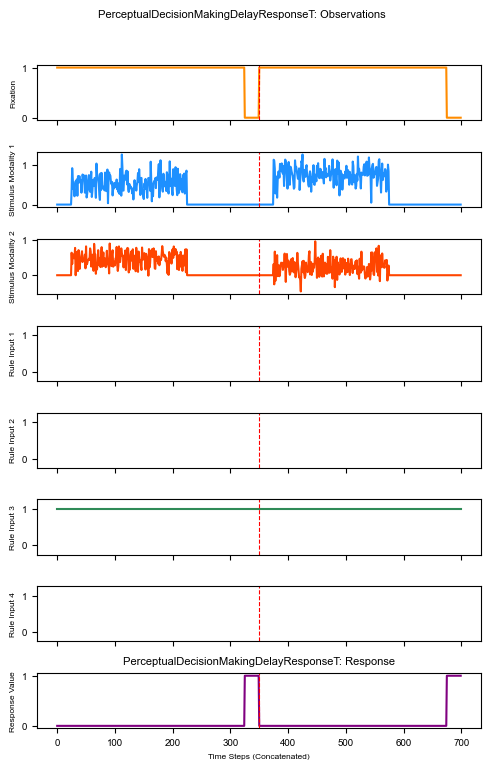

In [17]:
main.plot_env(
    "PerceptualDecisionMakingDelayResponseT", n_trials=2
)

### Get dynamics to plot

In [18]:
model = "leaky_gru_softplus_256_0.01_128_train.pth"

In [19]:
group = "master"
model_type, activation, hidden_size, lr, batch_size = parse_model_info(model)
curve_master_delay = get_dynamics_rnn_task(
    model_type,
    activation,
    hidden_size,
    lr,
    model,
    group,
    "cpu",
    "PerceptualDecisionMakingDelayResponseT",
    taskset=taskset,
)
curve_master_delay_anti = get_dynamics_rnn_task(
    model_type,
    activation,
    hidden_size,
    lr,
    model,
    group,
    "cpu",
    "AntiPerceptualDecisionMakingDelayResponseT",
    taskset=taskset,
)

In [20]:
# curves = [curve_master_pro, curve_master_anti, curve_master_delay, curve_master_delay_anti]
curves_tasks = [curve_master_delay, curve_master_delay_anti]
curves_tasks_to_plot, explained_variance = main.compute_common_pca(
    curves_tasks, n_components=3
)
curves_tasks_to_plot = [np.mean(curve, axis=1) for curve in curves_tasks_to_plot]

/Users/qguilhot/Library/Mobile Documents/com~apple~CloudDocs/ETHZ/RepAL/dsa_analysis/visualize_patterns.py:90: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


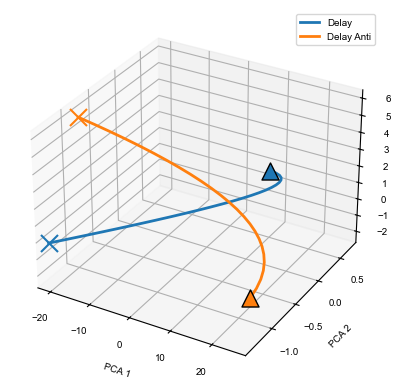

In [21]:
visualize_same_plot(curves_tasks_to_plot,["Delay", "Delay Anti"], palette=color_mapping_tasks)